In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [32]:
df = pd.read_csv(r"D:\Study\ML\dataset-of-10s.csv")

In [33]:
features_df = df.drop(['track', 'artist', 'uri', 'target'], axis=1)


Calculating Inertia and Silhouette Scores for k=2 to 10...
Displaying Elbow Method plot...


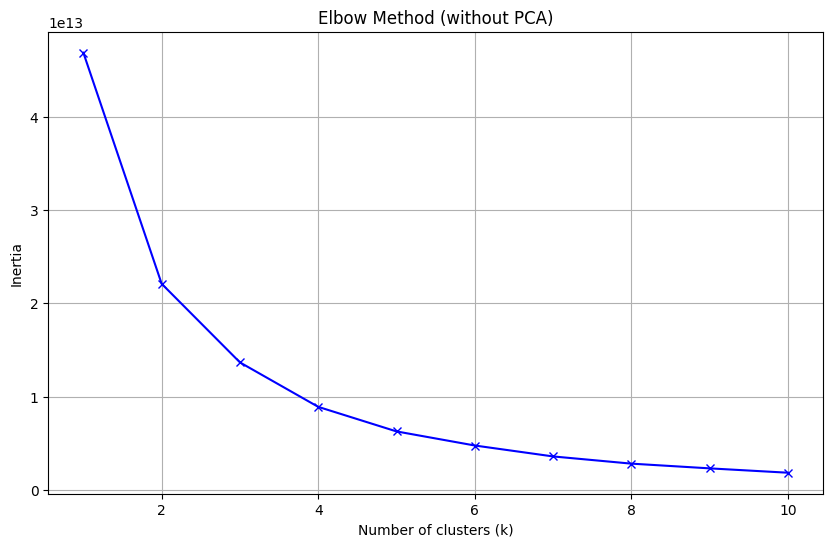

Displaying Silhouette Score plot...


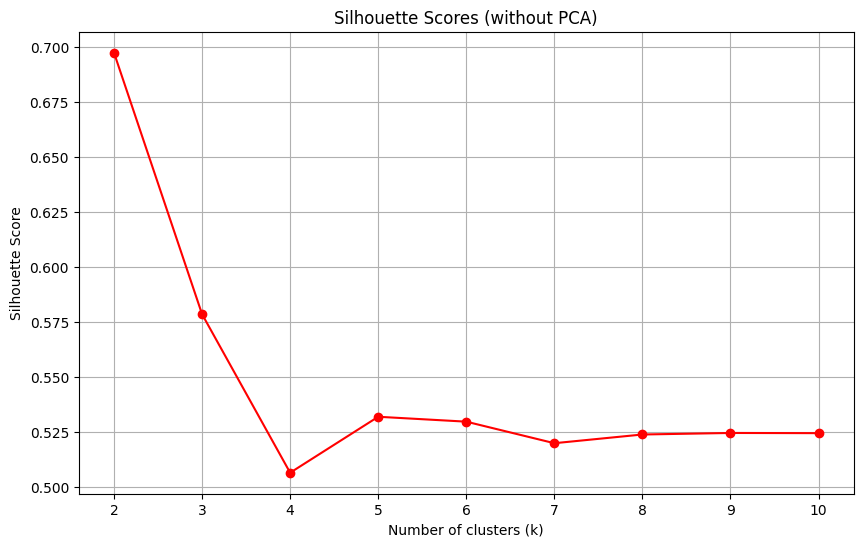

In [37]:
print("\nCalculating Inertia and Silhouette Scores for k=2 to 10...")
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    # Use the scaled features directly, instead of PCA-transformed features
    kmeans_model.fit(features_df)
    inertia.append(kmeans_model.inertia_)
    score = silhouette_score(features_df, kmeans_model.labels_)
    silhouette_scores.append(score)

# For a complete Elbow plot, we calculate k=1 separately
kmeans_k1 = KMeans(n_clusters=1, random_state=42, n_init=10)
kmeans_k1.fit(features_df)
full_inertia = [kmeans_k1.inertia_] + inertia
full_K = [1] + list(K)

# Plot Elbow Method
print("Displaying Elbow Method plot...")
plt.figure(figsize=(10, 6))
plt.plot(full_K, full_inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method (without PCA)')
plt.grid(True)
plt.show()

# Plot Silhouette Scores
print("Displaying Silhouette Score plot...")
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores (without PCA)')
plt.grid(True)
plt.show()

In [38]:
OPTIMAL_K = 4

print(f"\nTraining final K-Means model with {OPTIMAL_K} clusters...")
final_kmeans_model = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init=10)
final_kmeans_model.fit(features_df)



Training final K-Means model with 4 clusters...


KMeans(n_clusters=4, n_init=10, random_state=42)

In [39]:
print("\n--- Cluster Profiles (Model Evaluation) ---")
cluster_labels = final_kmeans_model.labels_
profiling_df = features_df.copy()
profiling_df['cluster'] = cluster_labels
cluster_profiles = profiling_df.groupby('cluster').mean()
print(cluster_profiles)
print("\nAnalyze the table above to give each cluster a 'personality'.")


--- Cluster Profiles (Model Evaluation) ---
         danceability    energy       key   loudness      mode  speechiness  \
cluster                                                                       
0            0.574683  0.689764  5.333642  -6.901136  0.651838     0.097320   
1            0.487190  0.645729  5.325000  -9.633253  0.591667     0.086462   
2            0.320709  0.521121  5.081633 -12.006816  0.561224     0.068462   
3            0.594388  0.650254  5.209987  -7.728524  0.656850     0.103770   

         acousticness  instrumentalness  liveness   valence       tempo  \
cluster                                                                   
0            0.184167          0.115764  0.195667  0.438857  123.511396   
1            0.224753          0.373178  0.209280  0.317674  121.644106   
2            0.326458          0.501033  0.222973  0.175870  108.649704   
3            0.255204          0.155794  0.193162  0.500415  121.545989   

           duration_ms  time_


--- Cluster Profiles (Model Evaluation) ---
         danceability    energy       key   loudness      mode  speechiness  \
cluster                                                                       
0            0.574683  0.689764  5.333642  -6.901136  0.651838     0.097320   
1            0.487190  0.645729  5.325000  -9.633253  0.591667     0.086462   
2            0.320709  0.521121  5.081633 -12.006816  0.561224     0.068462   
3            0.594388  0.650254  5.209987  -7.728524  0.656850     0.103770   

         acousticness  instrumentalness  liveness   valence       tempo  \
cluster                                                                   
0            0.184167          0.115764  0.195667  0.438857  123.511396   
1            0.224753          0.373178  0.209280  0.317674  121.644106   
2            0.326458          0.501033  0.222973  0.175870  108.649704   
3            0.255204          0.155794  0.193162  0.500415  121.545989   

           duration_ms  time_

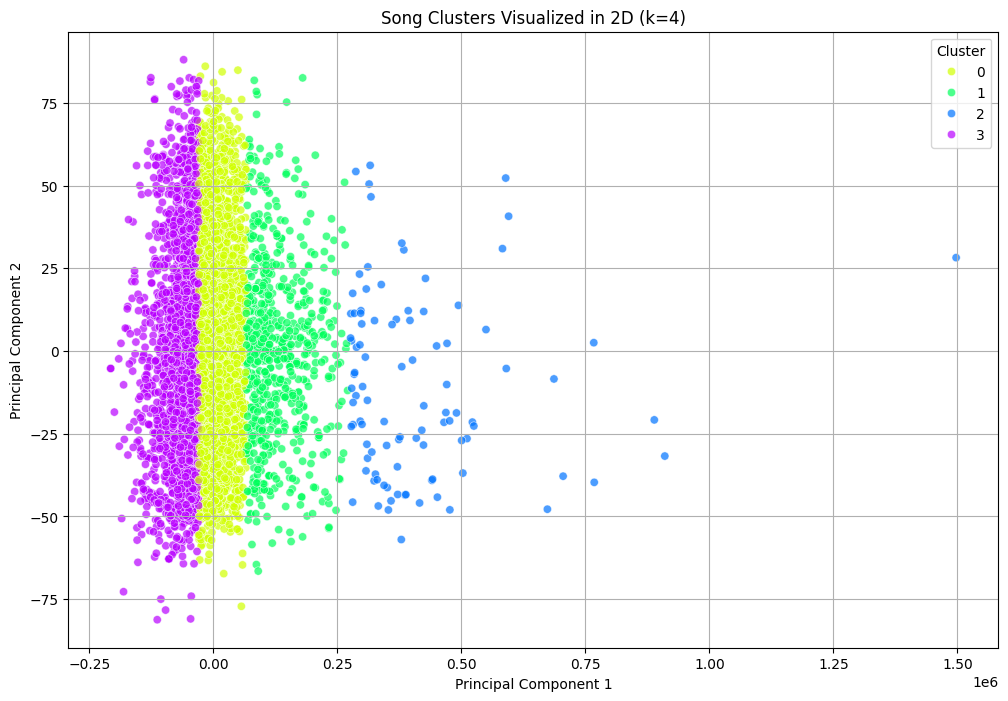

In [41]:
print("\n--- Cluster Profiles (Model Evaluation) ---")
cluster_labels = final_kmeans_model.labels_
profiling_df = features_df.copy()
profiling_df['cluster'] = cluster_labels
cluster_profiles = profiling_df.groupby('cluster').mean()
print(cluster_profiles)
print("\nAnalyze the table above to give each cluster a 'personality'.")


print("\nVisualizing clusters using PCA for 2D representation...")
pca_visual = PCA(n_components=2, random_state=42)
features_2d = pca_visual.fit_transform(features_df)

visual_df = pd.DataFrame(
    data=features_2d,
    columns=['Principal Component 1', 'Principal Component 2']
)
visual_df['cluster'] = cluster_labels

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='cluster',
    data=visual_df,
    palette=sns.color_palette("hsv", OPTIMAL_K),
    alpha=0.7
)
plt.title(f'Song Clusters Visualized in 2D (k={OPTIMAL_K})')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

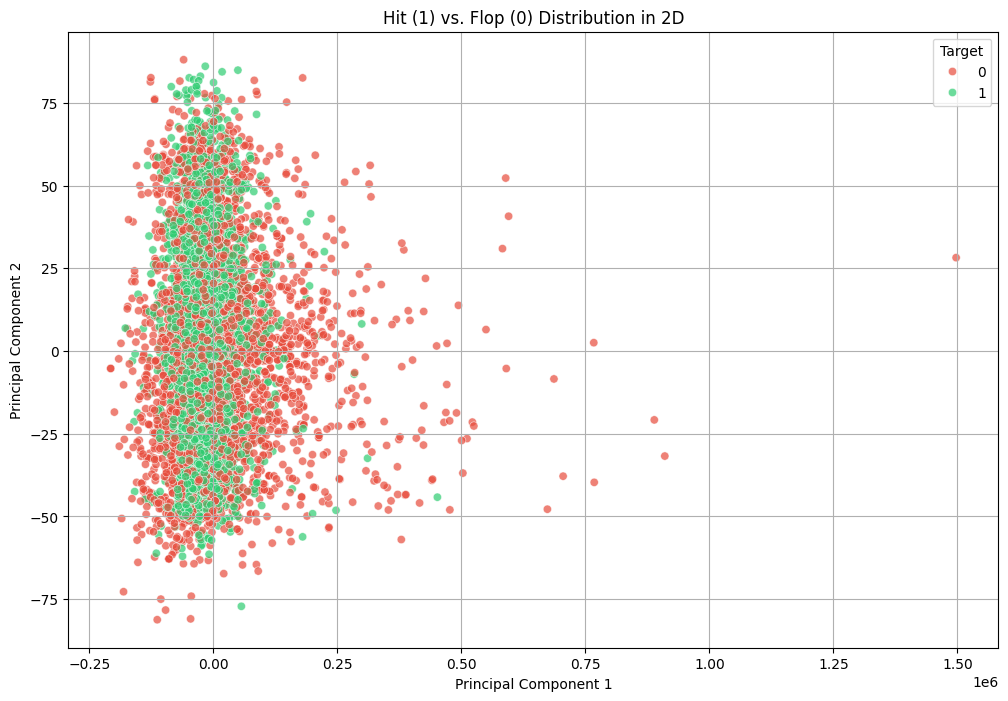

In [43]:
visual_df['target'] = df['target'].values

visual_df['cluster'] = visual_df['cluster'].astype('category')
visual_df['target'] = visual_df['target'].astype('category')
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='target', 
    data=visual_df,
    palette=['#e74c3c', '#2ecc71'], # Red for Flop (0), Green for Hit (1)
    alpha=0.7
)
plt.title('Hit (1) vs. Flop (0) Distribution in 2D')
plt.legend(title='Target')
plt.grid(True)
plt.show()

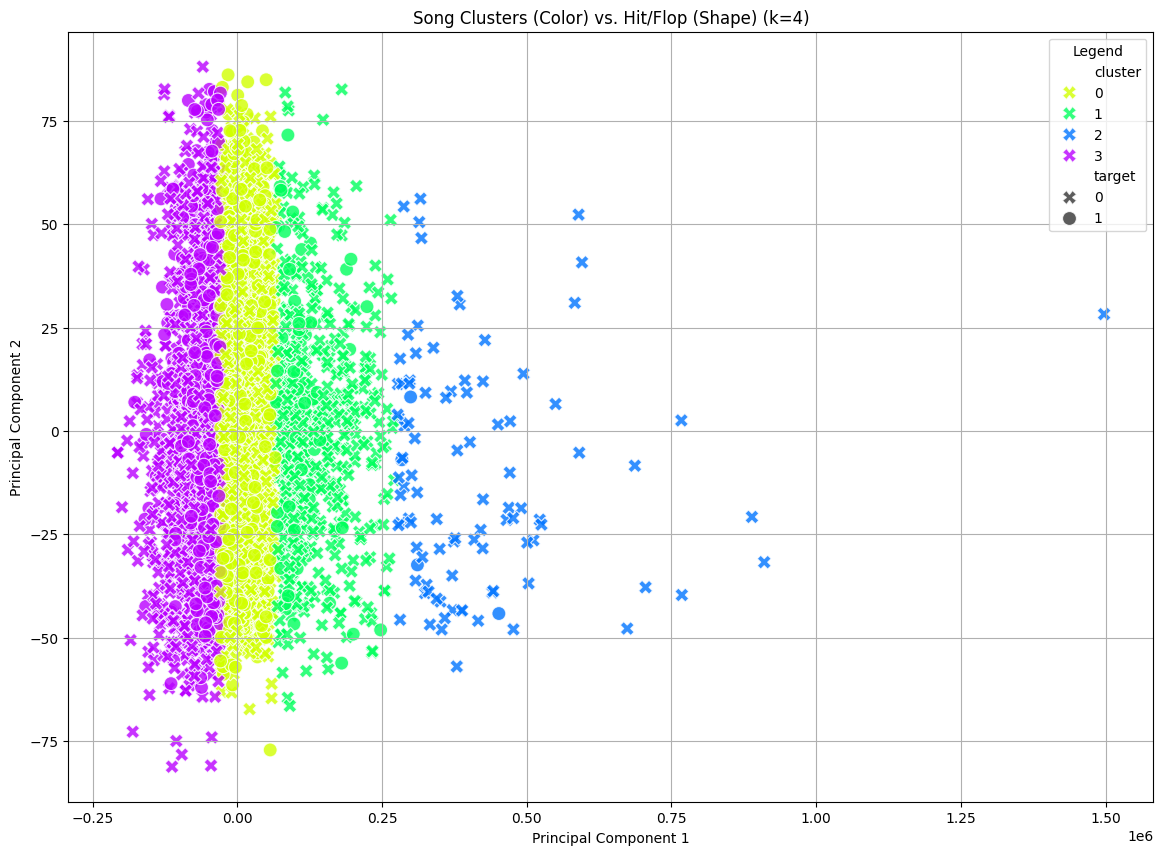

In [44]:
plt.figure(figsize=(14, 10))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='cluster',  # Color by the cluster
    style='target', # Use different shapes for target
    markers=['X', 'o'], # 'X' for Flop (0), 'o' for Hit (1)
    data=visual_df,
    palette=sns.color_palette("hsv", OPTIMAL_K),
    alpha=0.8,
    s=100 # Adjust size of markers
)
plt.title(f'Song Clusters (Color) vs. Hit/Flop (Shape) (k={OPTIMAL_K})')
plt.legend(title='Legend', loc='upper right')
plt.grid(True)
plt.show()

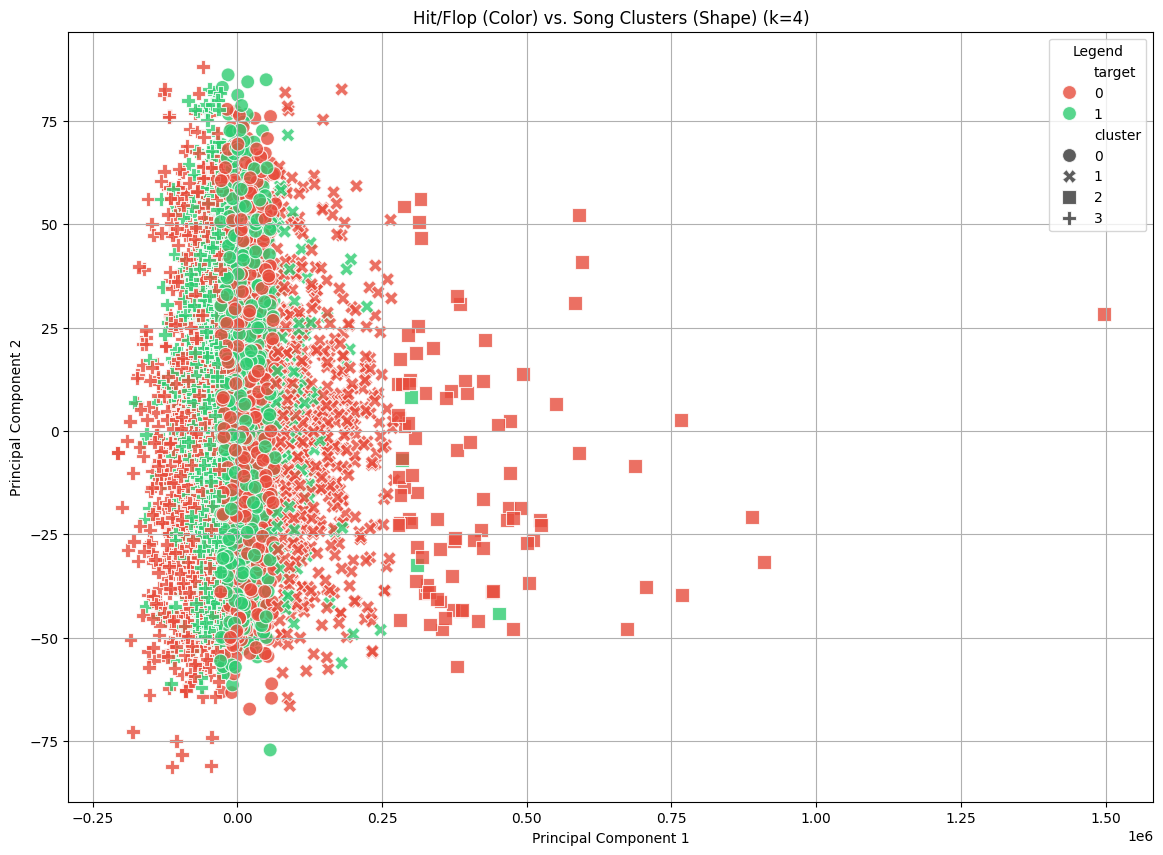

In [45]:
plt.figure(figsize=(14, 10))

# Define markers for the clusters (e.g., 'o', 'X', 's', 'P', 'D', '^')
# This needs to have at least OPTIMAL_K items
cluster_markers = ['o', 'X', 's', 'P', 'D', '^', 'v', '<', '>', '*', 'H']

sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='target',   # Color by the hit/flop target
    style='cluster', # Use different shapes for cluster
    markers=cluster_markers[:OPTIMAL_K], # Select markers for k clusters
    palette=['#e74c3c', '#2ecc71'], # Red for Flop (0), Green for Hit (1)
    data=visual_df,
    alpha=0.8,
    s=100 # Adjust size of markers
)
plt.title(f'Hit/Flop (Color) vs. Song Clusters (Shape) (k={OPTIMAL_K})')
plt.legend(title='Legend', loc='upper right')
plt.grid(True)
plt.show()

In [46]:
print("\n--- Cluster Profiles (Boundaries and Ranges) ---")

cluster_labels = final_kmeans_model.labels_

profiling_df = features_df.copy()
profiling_df['cluster'] = cluster_labels

profiling_df['target'] = df['target'].values

cluster_profiles_agg = profiling_df.groupby('cluster').agg(['mean', 'min', 'max'])

print("\nCluster Profiles (Mean, Min, Max):")
print(cluster_profiles_agg)

print("\n--- End of Profiles ---")


--- Cluster Profiles (Boundaries and Ranges) ---

Cluster Profiles (Mean, Min, Max):
        danceability                   energy                        key      \
                mean     min    max      mean       min    max      mean min   
cluster                                                                        
0           0.574683  0.0622  0.972  0.689764  0.001910  0.999  5.333642   0   
1           0.487190  0.0647  0.948  0.645729  0.001830  0.998  5.325000   0   
2           0.320709  0.0634  0.865  0.521121  0.005470  0.998  5.081633   0   
3           0.594388  0.0625  0.981  0.650254  0.000251  0.998  5.209987   0   

              loudness  ... time_signature chorus_hit                       \
        max       mean  ...            max       mean       min        max   
cluster                 ...                                                  
0        11  -6.901136  ...              5  41.112348  13.73329  185.93940   
1        11  -9.633253  ...              

In [47]:

cluster_labels = final_kmeans_model.labels_

df['cluster'] = cluster_labels

print("--- Cluster Size Distribution ---")
cluster_counts = df['cluster'].value_counts().sort_index()
cluster_percentages = df['cluster'].value_counts(normalize=True).sort_index() * 100

print("\nSong Counts per Cluster:")
print(cluster_counts)
print("\nPercentage of Songs per Cluster:")
print(cluster_percentages)

--- Cluster Size Distribution ---

Song Counts per Cluster:
cluster
0    3237
1     720
2      98
3    2343
Name: count, dtype: int64

Percentage of Songs per Cluster:
cluster
0    50.593936
1    11.253517
2     1.531729
3    36.620819
Name: proportion, dtype: float64


In [51]:
print("--- 'Poster Child' Songs Analysis ---")

for i in range(OPTIMAL_K):
    print(f"\n--- Sample Songs from Cluster {i} ---")
    
    cluster_songs = df[df['cluster'] == i]
    
    try:
        print(cluster_songs[['track', 'artist', 'target']].sample(5))
    except ValueError:
        print(cluster_songs[['track', 'artist', 'target']])

--- 'Poster Child' Songs Analysis ---

--- Sample Songs from Cluster 0 ---
               track                        artist  target
1741        Tomorrow                 Shakey Graves       0
2793           Wings                    Little Mix       1
908            Babel                Mumford & Sons       1
4505            24/7  Meek Mill Featuring Ella Mai       1
129   Passing Clouds         Hiss Golden Messenger       0

--- Sample Songs from Cluster 1 ---
                      track             artist  target
3852        Jesus You Alone  Highlands Worship       0
5664         Have You Seen?     Al Gromer Khan       0
5721  Rebirth - Xy-Me Remix   Cabaret Nocturne       0
4192           Funk-O-Holic         C. Da Afro       0
1182           Floor & More       Ronny Jordan       0

--- Sample Songs from Cluster 2 ---
                                                  track      artist  target
5441  Red Hook - Live At The Jazz Standard, New York...   Jakob Bro       0
1637           